
# Gradient Boosting (Intuition → Math → Implementation)

---

## 1. What is Gradient Boosting?
Gradient Boosting is a sequential ensemble algorithm where models are added one after another and each model corrects the previous model’s errors.

Final prediction = sum of weak learners.

---

## Core Formula
F(x) = F0 + ηh1(x) + ηh2(x) + ... + ηhM(x)

Where:
- F0 = baseline prediction (mean in regression)
- h = weak learner (usually tree)
- η = learning rate

---

## Step 1 — First Model
For regression:
F0 = mean(y)

This minimizes squared loss.

---

## Step 2 — Residuals
Residual = actual − prediction

r = y − ŷ

Next model learns residuals.

---

## Step 3 — Train Next Model
Train tree on residuals:
h1(x) ≈ residual

Update:
F1 = F0 + ηh1(x)

---

## General Update Rule
Fm(x) = Fm−1(x) + ηhm(x)

Repeat until convergence.

---

## Why “Gradient” Boosting?
Because residuals are negative gradients of loss:
r = −∂L/∂F

So we are doing gradient descent in function space.

---

## Learning Rate
Controls contribution of each model.

Small η:
- Slow learning
- Better generalization

Large η:
- Fast learning
- Overfitting risk

---

## Overfitting Control
1. Small learning rate
2. Shallow trees
3. Early stopping
4. Subsampling

---

## Key Hyperparameters
- n_estimators → number of models
- learning_rate → shrinkage
- max_depth → tree complexity
- subsample → randomness

---

## Final Prediction
F(x) = F0 + Σ ηhm(x)

Additive model.

---

## Pseudo Code
F = mean(y)
for m in M:
    residual = y − F
    model = train_tree(X, residual)
    F += lr * model.predict(X)

---

## Why Trees?
- Nonlinear
- Handle interactions
- No scaling needed

---

## Gradient Boosting vs AdaBoost
AdaBoost:
- Sample reweighting

Gradient Boost:
- Loss optimization via gradients

More flexible and powerful.

---

## Use Cases
- Credit scoring
- Fraud detection
- Recommendation systems
- Kaggle competitions

---

## Interview Summary
Gradient Boosting builds models sequentially where each model learns residual errors using gradient descent and predictions are summed with a learning rate.

---

## Memory Trick
Mean → Residual → Tree → Add → Repeat



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [96]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.6
y = 4*X[:, 0]**2 + 0.1 * np.random.randn(100)

In [97]:
import pandas as pd
df = pd.DataFrame()

In [98]:
df['X'] = X.reshape(100)
df['y'] = y

Text(0.5, 1.0, 'X vs Y')

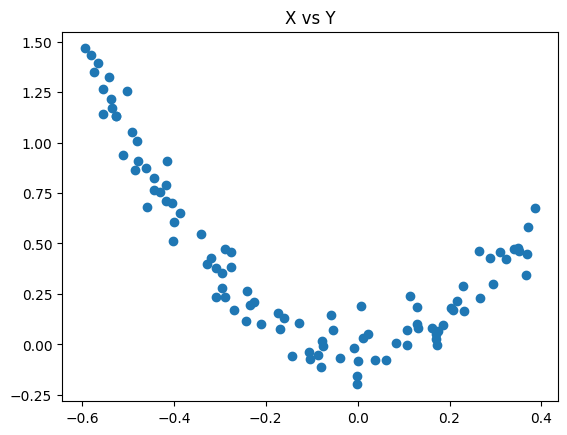

In [99]:
plt.scatter(df['X'],df['y'])
plt.title('X vs Y')

In [100]:
df['pred1'] = df['y'].mean()

In [101]:
df['res1'] = df['y'] - df['pred1']

In [102]:
df

,X,y,pred1,res1
0,-0.225460,0.212033,0.417764,-0.205731
1,0.350714,0.462101,0.417764,0.044337
2,0.131994,0.078866,0.417764,-0.338898
3,-0.001342,-0.198750,0.417764,-0.616514
4,-0.443981,0.766511,0.417764,0.348747
...,...,...,...,...
95,-0.106204,-0.036464,0.417764,-0.454227
96,-0.077267,0.016171,0.417764,-0.401593
97,-0.172459,0.153084,0.417764,-0.264680
98,-0.574581,1.348242,0.417764,0.930478


In [103]:
from sklearn.tree import DecisionTreeRegressor
tree1 = DecisionTreeRegressor(max_leaf_nodes=9)
tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=9)

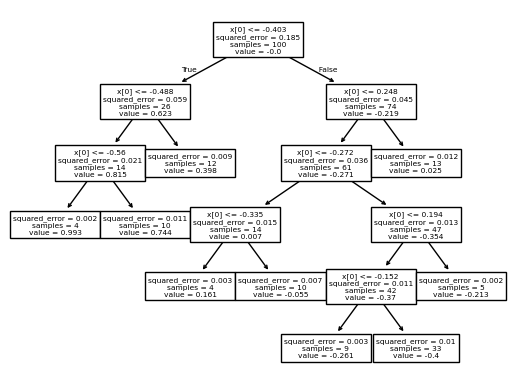

In [104]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [105]:
# generating X_test
X_test = np.linspace(-0.6, 0.4, 500)
y_pred = 0.41784 + tree1.predict(X_test.reshape(500, 1))

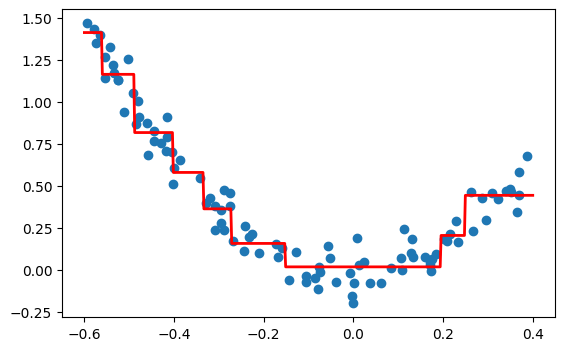

In [106]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])

In [107]:
df['pred2'] = 0.265458 + tree1.predict(df['X'].values.reshape(100,1))

In [108]:
df['res2'] = df['y'] - df['pred2']

In [109]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=9)
tree2.fit(df['X'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=9)

In [110]:
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [tree1,tree2])

Text(0.5, 1.0, 'X vs y')

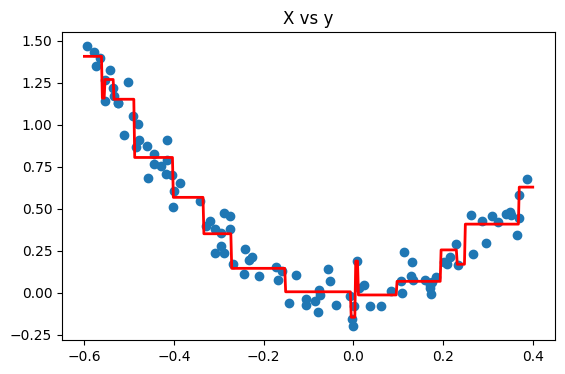

In [111]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

In [114]:
def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):

  if number == 0:
    return
  else:
    # do gradient boosting

    if count > 1:
      y = y - regs[-1].predict(X)
    else:
      foo = y

    tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_reg.fit(X, y)

    regs.append(tree_reg)

    x1 = np.linspace(-0.6, 0.4, 500)
    y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

    print(number)
    plt.figure()
    plt.plot(x1, y_pred, linewidth=2)
    plt.plot(X[:, 0], foo,"r.")
    plt.show()

    gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)

5


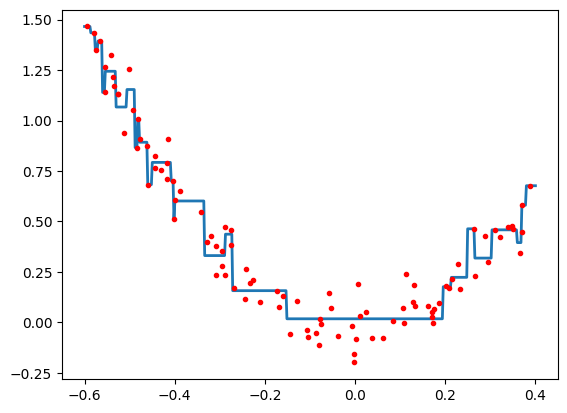

4


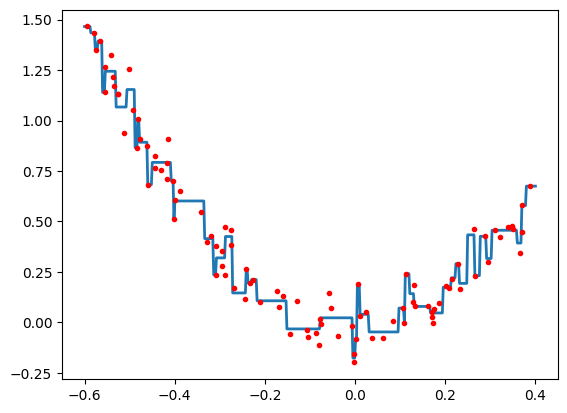

3


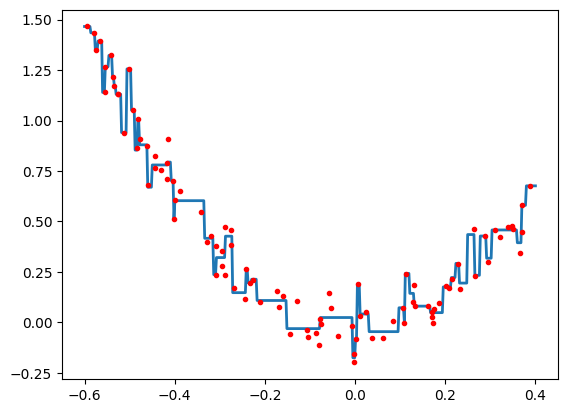

2


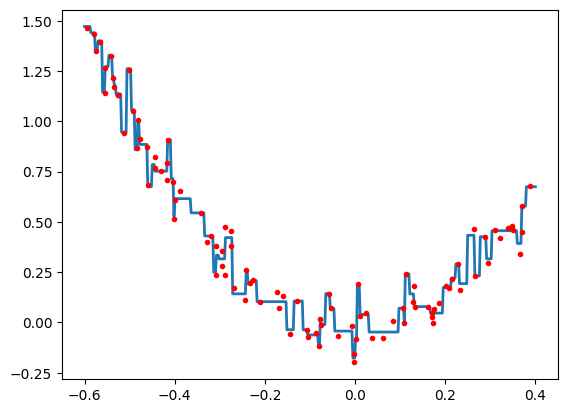

1


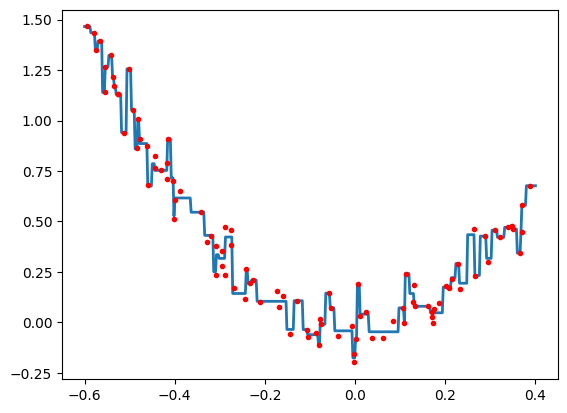

In [115]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.6
y = 4*X[:, 0]**2 + 0.1 * np.random.randn(100)
gradient_boost(X,y,5,lr=1)